In [2]:
from qiskit import pulse, circuit, transpile, assemble, schedule, IBMQ, QuantumCircuit, quantum_info as qi 
import qiskit
from qiskit.visualization import plot_gate_map, plot_error_map
from qiskit.visualization.pulse_v2 import draw
from qiskit.pulse import ShiftPhase, GaussianSquare, Drag, ControlChannel, MeasureChannel, DriveChannel, Play, Schedule
import numpy as np
from qiskit.tools import job_monitor
from copy import deepcopy
import scipy.optimize as opt
import matplotlib.pyplot as plt
from qiskit.visualization import pulse_drawer_v2 as draw

In [3]:
account_provider = IBMQ.load_account()
provider_opts = {'hub': 'ibm-q-ncsu', 'group': 'nc-state', 'project':'noiseanderror'}

# target backend
backend_name = 'ibmq_jakarta'

provider = IBMQ.get_provider(**provider_opts)
backend = provider.get_backend(backend_name)

# backend information
config = backend.configuration()
defaults = backend.defaults()
properties = backend.properties()

# instruction schedule map
inst_map = defaults.instruction_schedule_map

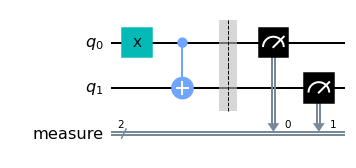

In [4]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0, 1)
qc.measure_active()
qc.draw('mpl',filename="cnot_circ.png")

In [5]:
tc = transpile(qc, backend)
sched = schedule(tc, backend)
draw(sched, time_range=[0, 23600]).savefig("cnot_sched.png")

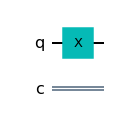

In [9]:
q1, q2 = 1,2
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.draw('mpl')

In [10]:
tc = transpile(qc, backend, initial_layout=[q1])
x_sched = schedule(tc, backend)

In [13]:
draw(x_sched).savefig("x_sched_presentation", bbox_inches="tight")

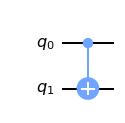

In [15]:
cx_circ = QuantumCircuit(2)
cx_circ.cx(0,1)
cx_circ.draw("mpl")

In [16]:
cx_basis_sched = schedule(cx_circ, backend)
cx_sched_fig = draw(cx_basis_sched)
cx_sched_fig.savefig("cx_basis_sched",bbox_inches='tight')